<a href="https://colab.research.google.com/github/gabriel-u-freitas/Fronteira_Eficiente_de_Markowitz/blob/main/Fronteira_Eficiente_de_Markowitz_Gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programa escrito por Gabriel Uzêda de Freitas**

Estudante de Administração Empresarial na ESAG/UDESC; membro do Clube de Finanças nos núcleos de Riscos & Derivativos em 2021.2 e 2022.1 e de Equity Research em 2022.2

https://www.linkedin.com/in/gabrieluzedadefreitas/

A seguir, o código em Python para simular 10.000 alocações de portfólio diferentes para uma carteira de ações definidas arbitrariamente pelo usuário e, então, plotar um gráfico da Fronteira Eficiente de Markowitz e retornar os pesos [das respectivas ações] que resultaram no portfólio "mais eficiente", ou seja, de maior *shape-ratio*

In [ ]:
#Carregar módulo pandas
import pandas as pd
#Importar biblioteca do pandas datareader
from pandas_datareader import data as pdr
#Importar a bliblioteca Numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#solução erro 'TypeError: string indices must be integers'
import yfinance as yfin

In [ ]:
#Escolher ativos que compõe o portfólio e buscar os históricos de preço ajustado de cada um
portfolio = ['EGIE3.SA','ABEV3.SA','PRIO3.SA']

#precos = pdr.DataReader(portfolio, data_source='yahoo', start='2018-01-01', end='2023-04-14')
#solução erro 'TypeError: string indices must be integers'
yfin.pdr_override()
precos = pdr.get_data_yahoo(portfolio, start='2018-01-01', end='2023-06-23')
precos_ajustados = precos['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
#Calcular log retornos e armazená-los em um data frame (df)
df_log= np.log(precos_ajustados / precos_ajustados.shift(1))

In [ ]:
#Quantidade de ativos no portfólio
qntd_ativos  = len(portfolio)

In [ ]:
#Encontrar matriz de variância-covariância entre os ativos
df_log.cov()

,ABEV3.SA,EGIE3.SA,PRIO3.SA
ABEV3.SA,0.000370,0.000123,0.000227
EGIE3.SA,0.000123,0.000235,0.000157
PRIO3.SA,0.000227,0.000157,0.001792


In [ ]:
#Rodar a simulação de 10000 portfólios, calcular o desvio-padrão (vol) diário, o retorno esperado diário e o Sharpe Ratio de cada um e armazenar os resultados em listas
lista_portfolio_retorno_esperado = []
lista_portfolio_volatilidade = []
lista_portfolio_sharpe_ratio = []
lista_pesos = []

for i in range (10000):
    #Gerador aleatório de pesos pros ativos somando 1
    pesos_ativos = np.random.random(qntd_ativos)
    pesos_ativos /= np.sum(pesos_ativos)
    lista_pesos.append(pesos_ativos)

    #Encontrar retorno esperado de cada portfólio e armazenar em uma lista
    portfolio_retorno_esperado = np.sum(pesos_ativos * df_log.mean())
    lista_portfolio_retorno_esperado.append(portfolio_retorno_esperado)

    #Encontrar desvio-padrão de cada portfólio e adicioná-lo a uma lista
    portfolio_volatilidade = np.sqrt(np.dot(pesos_ativos.T,np.dot(df_log.cov(), pesos_ativos)))
    lista_portfolio_volatilidade.append(portfolio_volatilidade)

    #Calcular o Sharpe Ratio, considerando risk-free rate de 8% a.a., e adicioná-lo a uma lista
    risk_free_rate_anualizada = 0.08
    risk_free_rate_diaria = (1+risk_free_rate_anualizada)**(1/252)-1
    portfolio_sharpe_ratio = (portfolio_retorno_esperado-risk_free_rate_diaria)/portfolio_volatilidade
    lista_portfolio_sharpe_ratio.append(portfolio_sharpe_ratio)

In [ ]:
#Criar df para organizar listas com vol, dev-pad e índice sharpe de cada portfólio
df_simulacoes  = pd.DataFrame({'Desvio-padrão (volatilidade)': lista_portfolio_volatilidade, 'Retorno esperado': lista_portfolio_retorno_esperado, 'Sharpe Ratio': lista_portfolio_sharpe_ratio})
df_simulacoes

,Desvio-padrão (volatilidade),Retorno esperado,Sharpe Ratio
0,0.019416,0.000741,0.022429
1,0.017008,0.000399,0.005528
2,0.016236,0.000120,-0.011408
3,0.015568,0.000335,0.001886
4,0.018253,0.000440,0.007385
...,...,...,...
9995,0.016272,0.000682,0.023116
9996,0.014841,0.000448,0.009622
9997,0.022356,0.001015,0.031760
9998,0.021532,0.001188,0.040987


In [ ]:
#Encontrar portfólio com maior Sharpe Ratio (+ eficiente)
maior_sharpe = df_simulacoes['Sharpe Ratio'].max()
portfolio_maior_sharpe = df_simulacoes.loc[df_simulacoes['Sharpe Ratio'] == maior_sharpe]
portfolio_maior_sharpe.T

,4764
Desvio-padrão (volatilidade),0.027449
Retorno esperado,0.001628
Sharpe Ratio,0.048189


In [ ]:
#Para encontrar os pesos [das respectivas ações] que resultaram no portfólio "mais eficiente", ou seja, de maior shape-ratio, é preciso
#colocar o número do índice que aparece no bloco de código anterior (acima) no lugar do primeiro número abaixo (entre os "[]"" e antes do "-1").
lista_pesos[4764-1]

NameError: ignored

In [ ]:
print(portfolio)

['EGIE3.SA', 'ABEV3.SA', 'PRIO3.SA']


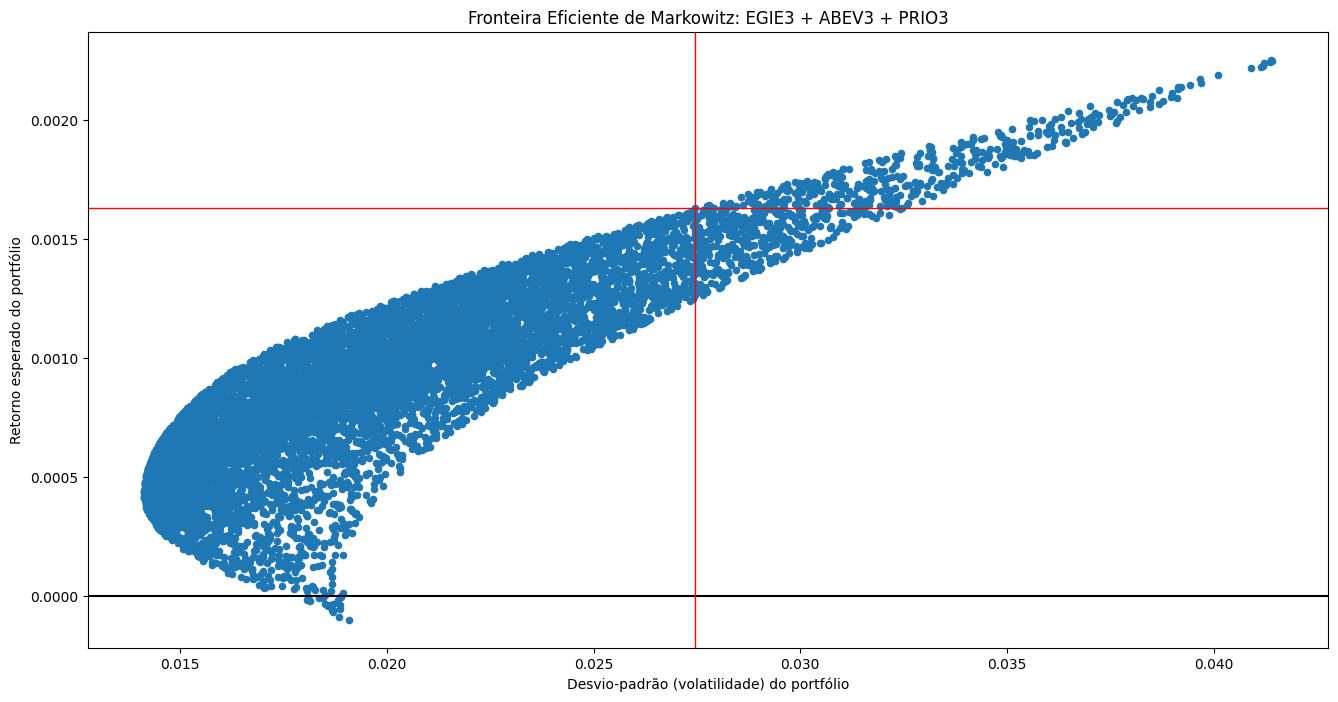

In [ ]:
#Plotar gráfico com desvio-padrão (vol) e retorno esperado de cada portfólio para encontra a Fronteira Eficiente de Markowitz
df_simulacoes.plot(x='Desvio-padrão (volatilidade)', y='Retorno esperado', kind='scatter',figsize=(16,8))
plt.title('Fronteira Eficiente de Markowitz: EGIE3 + ABEV3 + PRIO3')
plt.xlabel('Desvio-padrão (volatilidade) do portfólio')
plt.ylabel('Retorno esperado do portfólio')
plt.axhline(y=0, color='black')

#Adicionar uma linha vertical e uma horizontal indicando o portfólio com Sharpe Ratio máximo e sua respectiva vol e retorno
portfolio_maior_sharpe = np.array(portfolio_maior_sharpe)
plt.axvline(x=portfolio_maior_sharpe[0,0], color='red', linewidth=1)
plt.axhline(y=portfolio_maior_sharpe[0,1], color='red', linewidth=1)